In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as scp

#### Combining Datasets

In [2]:
# Read dataset and impute the missing values
from sklearn.impute import KNNImputer
df50 = pd.read_csv("../1950.csv")

genreCat = ["adult standards", "brill building pop", "british comedy", "british dance band", "classic soul", "classic uk pop", "deep adult standards", "doo-wop", "louisiana blues", "merseybeat", "yodeling"]


df50["genre"] = df50["genre"].astype("category")
df50["genre_cat"] = df50["genre"].cat.codes

df50.loc[df50["genre_cat"] == -1, "genre_cat"] = np.nan

imputer = KNNImputer(n_neighbors=5)
dfImputed = imputer.fit_transform(df50.iloc[:,4:])

df50["genre"] = [genreCat[int(round(dfImputed[i][-1],0))] for i in range(len(dfImputed))]
df50["decade"] = ["1950" for i in range(len(df50))]
df50 = df50.drop(columns=["genre_cat"])

display(df50)

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award,decade
0,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72,0.0,1950
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62,0.0,1950
2,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61,0.0,1950
3,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60,0.0,1950
4,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60,0.0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Collette,Billy Fury,adult standards,1982,155,44,55,-10,10,73,112,82,4,27,0.0,1950
69,Happy Days And Lonely Nights,Suzi Miller And Johnson Brothers,adult standards,2012,142,38,65,-8,13,69,146,43,3,27,0.0,1950
70,Stairway Of Love,Terry Dene,classic soul,2015,93,62,62,-7,25,86,120,55,4,27,0.0,1950
71,I've Waited So Long,Anthony Newley,british dance band,2012,137,36,27,-15,25,28,165,64,4,26,0.0,1950


In [3]:
## Label encoding
df90 = pd.read_csv("../1990.csv")

genre_code_dict = {}
genres = df90["genre"].dropna().unique()
df90["genre"] = df90["genre"].astype("category")
df90["genre_label"] = df90["genre"].cat.codes
for genre in genres:
    genre_code_dict[df90[df90["genre"] == genre].iloc[0]["genre_label"]] = genre

df90.loc[df90["genre_label"] == -1, "genre_label"] = np.nan

imputer_df = imputer.fit_transform(df90.iloc[:,4:])

df90["genre"] = [genre_code_dict[int(round(imputer_df[i][-1]))] for i in range(len(imputer_df))]
df90 = df90.drop(columns=["genre_label"])
df90["decade"] = ["1990" for i in range(len(df90))]

display(df90)


,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award,decade
0,No Scrubs,TLC,atl hip hop,1999,93,68,74,-4,7,59,214,3,10,79,0.0,1990
1,I Want It That Way,Backstreet Boys,boy band,2001,99,70,69,-6,16,48,214,22,3,76,0.0,1990
2,It Wasn't Me,Shaggy,dance pop,2000,95,61,85,-5,31,65,228,6,7,76,0.0,1990
3,"Because You Loved Me (Theme from ""Up Close and...",CÃ©line Dion,canadian pop,1996,120,47,61,-10,10,18,274,31,3,74,0.0,1990
4,Big Poppa - 2005 Remaster,The Notorious B.I.G.,east coast hip hop,1994,84,58,78,-7,14,76,253,43,27,74,0.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4,50,0.0,1990
84,If You Ever,East 17,boy band,1996,140,68,58,-9,31,57,255,18,3,48,0.0,1990
85,Pump Up The Jam,Technotronic,eurodance,2019,125,84,89,-9,5,72,320,1,7,46,0.0,1990
86,Doin' It,LL Cool J,east coast hip hop,1996,95,53,81,-12,12,62,294,34,19,46,0.0,1990


In [4]:
df60 = pd.read_csv("../1960.csv")
df60["decade"] = ["1960" for i in range(len(df60))]
                  
df70 = pd.read_csv("../1970.csv")
df70["decade"] = ["1970" for i in range(len(df70))]

df80 = pd.read_csv("../1980.csv")
df80["decade"] = ["1980" for i in range(len(df80))]

df00 = pd.read_csv("../2000.csv")
df00["decade"] = ["2000" for i in range(len(df00))]

df10 = pd.read_csv("../2010.csv")
df10["decade"] = ["2010" for i in range(len(df10))]

dfTop10 = pd.read_csv("../top10s.csv")
df10["decade"] = ["2010" for i in range(len(df10))]

frames = [df50, df60, df70, df80, df90, df00, df10]
aggregated_df = pd.concat(frames).drop_duplicates()
display(aggregated_df)

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award,decade
0,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72,0.0,1950
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62,0.0,1950
2,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61,0.0,1950
3,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60,0.0,1950
4,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60,0.0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Dynamite,Taio Cruz,dance pop,2011,120,79,76,-4,3,87,203,0,8,56,0.0,2010
97,Break Your Heart,Taio Cruz,dance pop,2011,122,89,67,-5,24,68,185,0,3,54,0.0,2010
98,Summer Air,ItaloBrothers,dance pop,2017,102,75,76,-4,8,49,184,6,7,43,0.0,2010
99,All I Wanna Do,Martin Jensen,big room,2016,112,79,73,-4,7,56,194,16,7,32,0.0,2010


Text(0.5, 1.0, 'Correlation matrix')

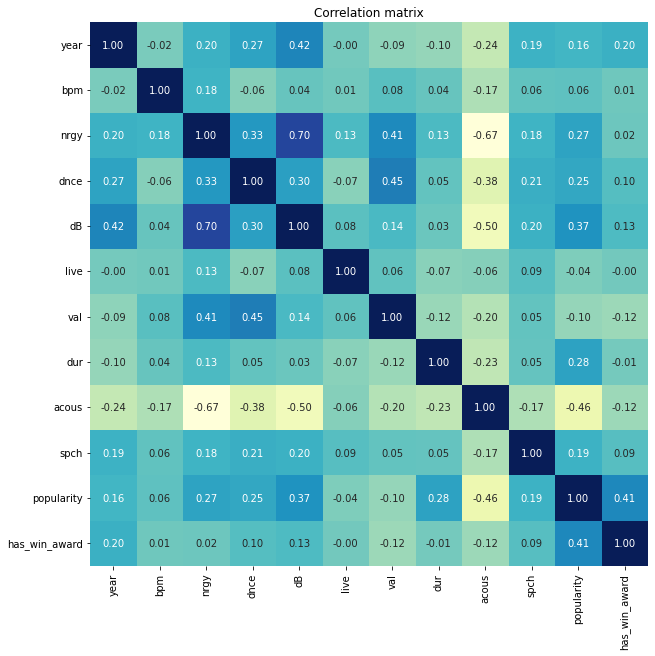

In [5]:
plt.figure(figsize=(10, 10))

sns.heatmap(
    aggregated_df.select_dtypes(np.number).corr(),
    annot=True,
    cbar=False,
    fmt="0.2f",
    cmap="YlGnBu",
    xticklabels=aggregated_df.select_dtypes(np.number).columns,
    yticklabels=aggregated_df.select_dtypes(np.number).columns
    
    )
plt.title("Correlation matrix")

Text(0.5, 1.0, 'Correlation matrix')

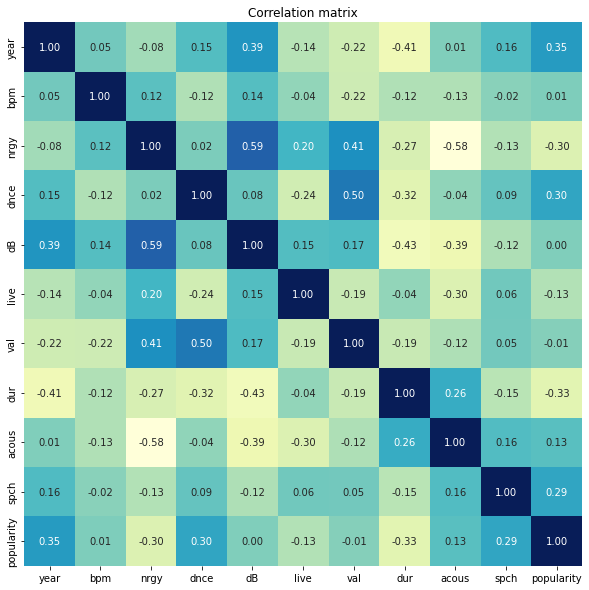

In [6]:
award_winning_df = aggregated_df[aggregated_df["has_win_award"] == 1.0].drop(columns=["has_win_award"])

plt.figure(figsize=(10, 10))

sns.heatmap(
    award_winning_df.select_dtypes(np.number).corr(),
    annot=True,
    cbar=False,
    fmt="0.2f",
    cmap="YlGnBu",
    xticklabels=award_winning_df.select_dtypes(np.number).columns,
    yticklabels=award_winning_df.select_dtypes(np.number).columns
    
    )
plt.title("Correlation matrix")

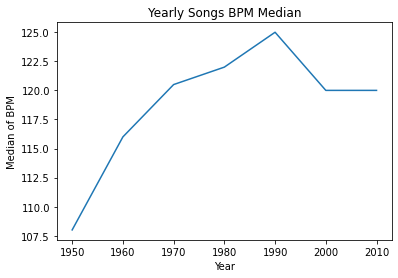

In [7]:
dfs = ["bpm", "dnce", "dB", "live", "val", "dur", "acous", "spch", "popularity"]
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['bpm'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of BPM')
plt.title('Yearly Songs BPM Median')
plt.show()

From the visualization above, we can see the median of the bpm attribute of the songs from 1950-2010. The bpm attribute describes the beat per minute of the song. It can be seen that, overall, the bpm of the songs increases within the 6 decades. That is, songs are becoming faster. However, there is a slight decrease by 5 beats from the 1990s to the 200s, where it plateaus in the 2000s to the 2010s.

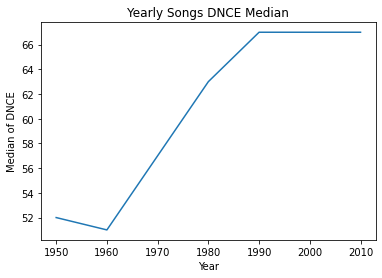

In [8]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['dnce'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of DNCE')
plt.title('Yearly Songs DNCE Median')
plt.show()

The dnce value overall increases within the 6 of the most popular and iconic songs from each decade increases from 1960s to 2000s after experiencing a slight decrease in the 1950s. This implies that songs (the most popular and iconic songs from each decade) are becoming more danceable.

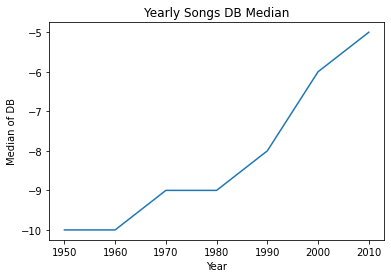

In [9]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['dB'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of DB')
plt.title('Yearly Songs DB Median')
plt.show()

From the visualization above, we can see the median of the DB attribute of the songs from 1950-2010. The db attribute describes the decibel of the song, that is, the higher the value, the louder the song will be. It can be seen that the median of the db attribute of the songs experiences an increasing trend within the 6 decades. Within the 1950s to the 1960s, there is no major changes that is observed at the median level. It then experiences a slight increase in the 1960s to the 1970s and in the 1980s to the 1990s. The most significant increase can be seen in the 1990s to 2000s, where the median increases by 2 db.

From this observation, it can be observed that, in overall, songs are becoming louder.

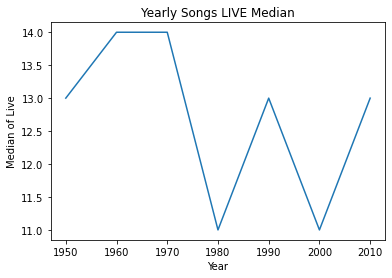

In [10]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['live'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of Live')
plt.title('Yearly Songs LIVE Median')
plt.show()

From the visualization above, we can see the median of the DB attribute of the songs from 1950-2010. The live attribute describes how likely the song is a live recording. Although there is no a uniform trend within the 6 decades, it is observable there is a decrease in trend for live recorded songs in the 1970s to the 1980s.

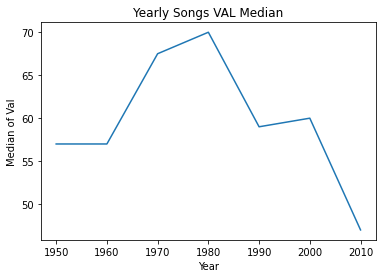

In [11]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['val'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of Val')
plt.title('Yearly Songs VAL Median')
plt.show()

From the line plot above we see the median of the val attribute of every song from 1950-2010. The val attribute describes how positive the mood for the song is. We see that initially, between 1950 and 1980, songs were progressively becoming more positive. However, the opposite was seen during the following years. We see that the songs were giving less of a positive mood after 1980.

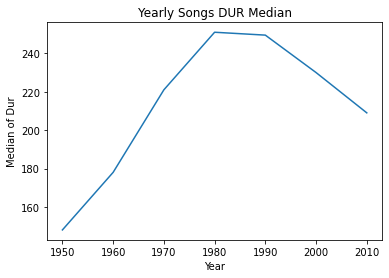

In [12]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['dur'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of Dur')
plt.title('Yearly Songs DUR Median')
plt.show()

The line plot above displays the median of the dur attribute of every song between 1950-2010. The dur attribute describes the duration of the song in seconds. We see that at first there was a steady increase in duration between 1950-1980, peaking at 251. From 1980 to 2010 we see that the duration of songs are becoming shorter, where the trend is going back towards song durations prior to 1980.

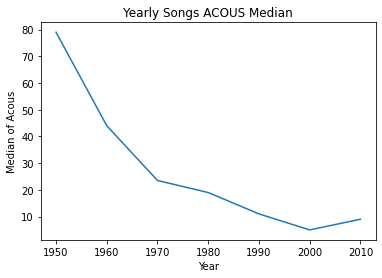

In [13]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['acous'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of Acous')
plt.title('Yearly Songs ACOUS Median')
plt.show()

The line plot above displays the median of the acous attribute of every song between 1950-2010. The acous attribute describes acoustic the song is. The trend that we can observe looks pretty obvious since we see that from 1950-2000 there has always been a decrease in the median of the acous attribute, meaning that songs are progressively getting less and less acoustiv throughout the decades, with only a slight increase from 2000 to 2010.

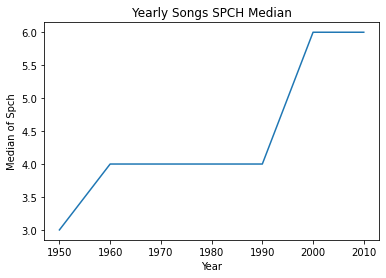

In [14]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['spch'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of Spch')
plt.title('Yearly Songs SPCH Median')
plt.show()

The line plot above displays the median of the spch attribute of every song between 1950-2010. The spch attribute describes the amount of spoken words there is in a song. There was an increase in spoken words in a song between 1950 and 1960, but the most interesting part that it plateaus between 1960 and 1990. During the 2000s the value jumped from 4 all the way up to 6, where it stayed the same during the following year (2010).

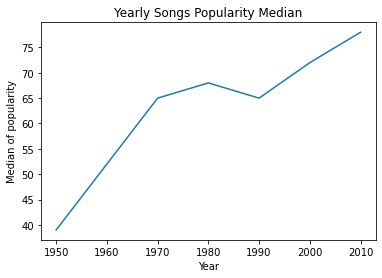

In [24]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['popularity'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of popularity')
plt.title('Yearly Songs Popularity Median')
plt.show()

The line plot above displays the median of the popularity attribute of every song in the combined data set from the 1950s to the 2010s. The popularity attribute describes how popular a song is, where a higher popularity value implies a higher popularity for the song. 

Note that, popularity is assumed to be measured from the this decade's audiences. This assumption is taken as the songs are listened through spotify.

From the line plot above, it can be seen that the popularity attribute of the song majorly increases in the 1950s to the 1970s. It then increases slightly from 65 to 70 in the 1970s to the 1980s before decreasing back in within 1980s to 1990s. Finally, in 1990s onward, the popularity attribute of the most popular and iconic songs in the corresponding decade increases.

The overall increase in song popularity implies that the recent songs are more popular than their predecesors to the current audience. This is likely due to a generation gap between the audience and the song, where songs closer to the current audiences' generation tend to relate more and fit the culture better.